Лабораторная работа №4. Кластеризация данных

Подготовка выборки для кластеризации данных

In [1]:
# Импортируем библиотеки
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt
import pandas as pd

# Загружаем данные
games_df = pd.read_excel("E:/Users10/user/Desktop/mag/iad/labi/data/data_homework_sep.xlsx")

%matplotlib inline

Для ускорения процесса будем работать с patch2, также удалим некоторые столбцы, чтобы попытаься выделить кластеры, исходя из результатов сражений

In [2]:
patch2 = games_df.loc[games_df['patch'].isin(['2'])]
del patch2['dt']
del patch2['patch']
del patch2['item_nation']
del patch2['item_class']
del patch2['item_level']

patch2.head()

,player_id,kills_made,credits,exp,is_surv,is_win
474527,1779818,0,6210,125,1,0
474528,1798639,0,23169,151,1,0
474529,1731294,0,41232,902,1,1
474530,1712637,0,8921,123,1,0
474531,1726253,0,5939,146,1,0


Разделим набор данных (будем выделять кластеры, например, по таким признакам, как kills_made и is_win)

In [36]:
x_axis = patch2.kills_made  # kills_made
y_axis = patch2.is_win  # is_win

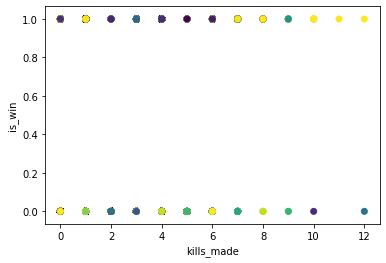

In [37]:
# Построение
plt.xlabel("kills_made")
plt.ylabel("is_win")
plt.scatter(x_axis, y_axis, c=patch2.player_id)
plt.show()

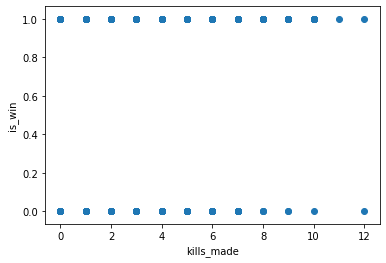

In [25]:
plt.xlabel("kills_made")
plt.ylabel("is_win")
plt.scatter(x_axis, y_axis)
plt.show()

Метод k-средних. Наиболее популярным алгоритмом кластеризации данных является метод k-средних. Это итеративный алгоритм кластеризации, основанный на минимизации суммарных квадратичных отклонений точек кластеров от центроидов (средних координат) этих кластеров.

In [29]:
from sklearn.model_selection import train_test_split 
y = patch2.player_id 
X_train, X_test, y_train, y_test = train_test_split (patch2, y, test_size = 0.2) 
print(X_train.shape, y_train.shape) 
print(X_test.shape, y_test.shape)

(369947, 6) (369947,)
(92487, 6) (92487,)


In [30]:
patch2.head()

,player_id,kills_made,credits,exp,is_surv,is_win
474527,1779818,0,6210,125,1,0
474528,1798639,0,23169,151,1,0
474529,1731294,0,41232,902,1,1
474530,1712637,0,8921,123,1,0
474531,1726253,0,5939,146,1,0


[5]
[5 5 1 ... 2 4 9]


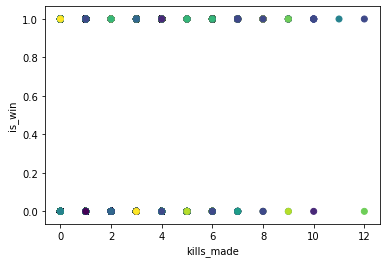

In [31]:
# Импортируем алгоритм из библиотеки
from sklearn.cluster import KMeans

# Описываем модель
model = KMeans(n_clusters=10)

# Проводим моделирование
model.fit(patch2)

# Предсказание на единичном примере
predicted_label = model.predict([[1779818, 0, 6210, 125, 1, 0]])

# Предсказание на всем наборе данных
all_predictions = model.predict(patch2)

# Выводим предсказания
print(predicted_label)
print(all_predictions)

# Рисуем график
plt.xlabel("kills_made")
plt.ylabel("is_win")
plt.scatter(x_axis, y_axis, c=all_predictions)
plt.show()

Иерархическая кластеризация. Поскольку в нашем случае объём данных большой, данный метод требует значильных затрат времени, потому необходимо сильно урезать выборку

In [46]:
#Для ускорения процесса будем работать только с patch2, линией орудия MediumTK, уровнем орудия 4 и страной Германией, 
#также удалим столбцы patch, item_class, dt, item_nation, item_level
patch2 = games_df.loc[games_df['patch'].isin(['2'])]

del patch2['dt']
del patch2['patch']

mediumTK= patch2.loc[patch2['item_class'].isin(['mediumTK'])]
del mediumTK['item_class']

Germany = mediumTK.loc[mediumTK['item_nation'].isin(['GERMANY'])]
del Germany['item_nation']

Germany1 = Germany.loc[Germany['item_level'].isin(['4'])]
del Germany1['item_level']

In [48]:
Germany1.head()

,player_id,kills_made,credits,exp,is_surv,is_win
474556,1842721,0,8708,120,1,0
475145,1844306,0,6130,190,1,1
476747,1845198,0,4785,107,1,0
476962,1842721,0,6024,143,1,0
476977,1837144,2,5383,156,1,0


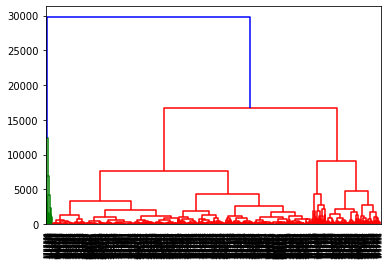

In [49]:
# Исключаем информацию об id игрока, сохраняем для дальнейшего использования
varieties = list(Germany1.pop('player_id'))

# Извлекаем измерения как массив NumPy
samples =  Germany1.values

# Реализация иерархической кластеризации при помощи функции linkage
mergings = linkage(samples, method = 'complete')

# Строим дендрограмму, указав параметры, удобные для отображения
dendrogram(mergings,
           labels=varieties,
           leaf_rotation=90,
           leaf_font_size=6,
           )

plt.show()

Какие-то кластеры выделяются, однако понятно, что в нашем случае, когда объём данных огромен, такой метод не очень эффективен, а на маленькой выборке в нашем случае будет совсем неточным, нужно уменьшать размерность

Понижение размерности с методом t-SNE. Сейчас просто посмотрим, как это работает (сократим по максимуму выборку)

In [52]:
from sklearn.manifold import TSNE

Germany2 = Germany.loc[Germany['item_level'].isin(['4'])]
del Germany2['item_level']

Germany2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1046 entries, 474556 to 935437
Data columns (total 6 columns):
player_id     1046 non-null int64
kills_made    1046 non-null int64
credits       1046 non-null int64
exp           1046 non-null int64
is_surv       1046 non-null int64
is_win        1046 non-null int64
dtypes: int64(6)
memory usage: 57.2 KB


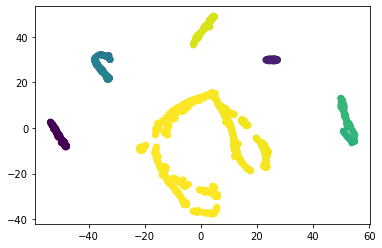

In [54]:
# Определяем модель и скорость обучения
model = TSNE(learning_rate=100)

# Обучаем модель
transformed = model.fit_transform(Germany2)

# Представляем результат в двумерных координатах
x_axis = transformed[:, 0]
y_axis = transformed[:, 1]

plt.scatter(x_axis, y_axis, c = Germany2.player_id)
plt.show()

Метод главных компонент (PCA) - для модели с прогнозом is_win

In [56]:
from sklearn import decomposition

#Почистим данные (закодируем текстовые)
from sklearn.preprocessing import LabelEncoder

patch2 = games_df.loc[games_df['patch'].isin(['2'])]
del patch2['dt']
del patch2['patch']

label = LabelEncoder()

dicts = {}
label.fit(patch2.item_class.drop_duplicates()) #задаем список значений для кодирования

dicts['item_class'] = list(label.classes_)

patch2.item_class = label.transform(patch2.item_class) #заменяем значения из списка кодами закодированных элементов

label.fit(patch2.item_nation.drop_duplicates())

dicts['item_nation'] = list(label.classes_)

patch2.item_nation = label.transform(patch2.item_nation)

In [57]:
X = patch2
y = patch2.is_win

In [58]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score

# Выделим из наших данных валидационную выборку
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, 
                                                    stratify=y, 
                                                    random_state=142)

# Для примера возьмём неглубокое дерево решений
clf = DecisionTreeClassifier(max_depth=2, random_state=142)
clf.fit(X_train, y_train)
preds = clf.predict_proba(X_test)
print('Accuracy: {:.5f}'.format(accuracy_score(y_test, 
                                                preds.argmax(axis=1))))

Accuracy: 1.00000


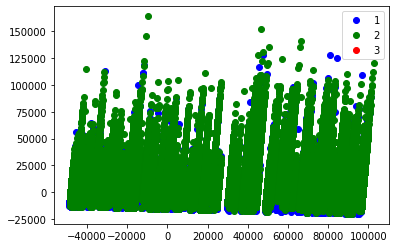

In [60]:
# Прогоним встроенный в sklearn PCA
pca = decomposition.PCA(n_components=2)
X_centered = X - X.mean(axis=0)
pca.fit(X_centered)
X_pca = pca.transform(X_centered)

# И нарисуем получившиеся точки в нашем новом пространстве
plt.plot(X_pca[y == 0, 0], X_pca[y == 0, 1], 'bo', label='1')
plt.plot(X_pca[y == 1, 0], X_pca[y == 1, 1], 'go', label='2')
plt.plot(X_pca[y == 2, 0], X_pca[y == 2, 1], 'ro', label='3')
plt.legend(loc=0);

In [61]:
# Повторим то же самое разбиение на валидацию и тренировочную выборку.
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=.3, 
                                                    stratify=y, 
                                                    random_state=142)

clf = DecisionTreeClassifier(max_depth=2, random_state=142)
clf.fit(X_train, y_train)
preds = clf.predict_proba(X_test)
print('Accuracy: {:.5f}'.format(accuracy_score(y_test, 
                                                preds.argmax(axis=1))))

Accuracy: 0.65851
